In [1]:
"""
------------------------
Training file for MENACE
------------------------
"""
print '==========================================='
print '==== Naughts & Crosses based on MENACE ===='
print '= Note: 1s are naughts and 2s are crosses ='
print '==========================================='
# -----------------
# Import modules
# -----------------
import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt


==== Naughts & Crosses based on MENACE ====
= Note: 1s are naughts and 2s are crosses =


The higher the number of iterations the
better the computer will play.


Enter the number of iterations:  500
Weighted average decision making (y/n):  y


---------
menace.py
---------
Reward win: 1
Reward draw: 0
Reward lose: -1
Number of iterations: 500
- Training complete -


Plot a graph of training? (y/n)  y


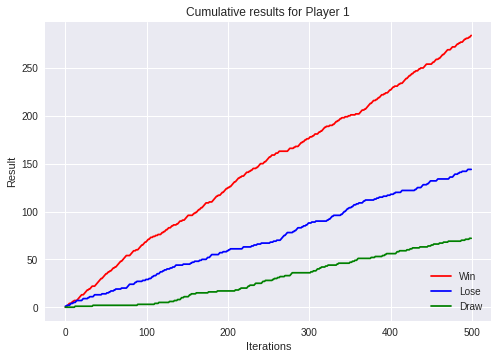

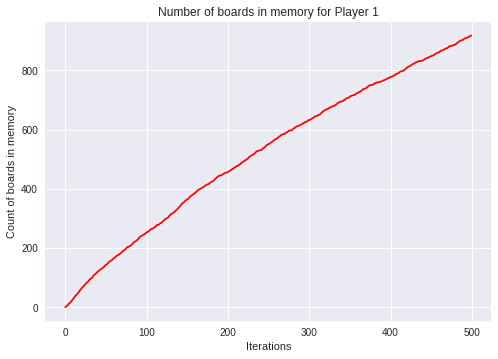

Would you like to play a game? (y/n)  y


-------------------------------------------------
        Starting computer vs. human game
-------------------------------------------------
Notes:
You can overwrite the computers moves but don't
The computer will learn from the games
Select your move with the number keys
Mode = 1 (Computer vs. Human)
Mode = 2 (Human vs. Computer)
-------------------------------------------------


Select mode: (1 or 2)  1


[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
-----------------


Where would you like to go (1 - 9):  5


[0, 0, 0]
[0, 2, 1]
[1, 0, 0]
-----------------


Where would you like to go (1 - 9):  1


[2, 0, 0]
[0, 2, 1]
[1, 0, 1]
-----------------


Where would you like to go (1 - 9):  3


[2, 0, 2]
[1, 2, 1]
[1, 0, 1]
-----------------


Where would you like to go (1 - 9):  2


== You won the game ==
----------------------------------------
Type 'game(mode)' to start a new game
mode = 1 (Computer vs. Human)
mode = 2 (Human vs. Computer)
----------------------------------------


In [3]:
# -----------------
# Inputs
# -----------------
reward_win = 1
reward_draw = 0
reward_lose = -1
print 'The higher the number of iterations the'
print 'better the computer will play.'
iterations = int(raw_input('Enter the number of iterations: '))
prob_mode = raw_input('Weighted average decision making (y/n): ')

# -------------
# Print options
# -------------
# prob_mode = n    # y = weighted average of possible moves
print_games = False  # True = Print count of games
print_mode = False   # True = Print stats for debugging

print '---------'
print 'menace.py'
print '---------'
print 'Reward win: %s' % reward_win
print 'Reward draw: %s' % reward_draw
print 'Reward lose: %s' % reward_lose
print 'Number of iterations: %s' % iterations

# Memory of player 1
memory_boards_A = []
memory_weights_A = []

# Memory of player 2
memory_boards_B = []
memory_weights_B = []

# Set up the results graph
graph_win = []
graph_lose = []
graph_draw = []
graph_boards = []
status_counts = [0,0,0] # Win, Lose, Draw

def print_weights(boards,weights):
    for i in range(len(boards)):
        print 'Board layout | Weights (%s)' % i
        print boards[i][0:3], "|" , weights[i][0:3]
        print boards[i][3:6], "|" , weights[i][3:6]
        print boards[i][6:9], "|" , weights[i][6:9]

def make_graph(win,lose,draw,boards):    
    plt.plot(win, 'r-', label='Win')
    plt.plot(lose, 'b-', label='Lose')
    plt.plot(draw, 'g-', label='Draw')    
    plt.ylabel('Result')
    plt.xlabel('Iterations')
    title = plt.title('Cumulative results for Player 1')
    legend = plt.legend(loc='lower right', shadow=False)
    plt.show()
    
    plt.plot(boards, 'r-', label='Boards in memory')
    plt.ylabel('Count of boards in memory')
    plt.xlabel('Iterations')
    title = plt.title('Number of boards in memory for Player 1')
    plt.show()
    

def rotate_matrix(matrix):
    rot_matrix = []
    rot_matrix.append(matrix[6])
    rot_matrix.append(matrix[3])
    rot_matrix.append(matrix[0])
    rot_matrix.append(matrix[7])
    rot_matrix.append(matrix[4])
    rot_matrix.append(matrix[1])
    rot_matrix.append(matrix[8])
    rot_matrix.append(matrix[5])
    rot_matrix.append(matrix[2])
    return rot_matrix
    
def memory_check(game_board,mem_boards,mem_weights):
    
    # *********************************
    # Need to make this weighted random
    # *********************************
    opt = []
    opt_weights = []
    f_opt = []
    
    # Find the possible moves
    opt = [i for i, x in enumerate(game_board) if x == 0]

    # Probability method    
    # ------------------
    if prob_mode == 'y':

        # See if the board is in the memory
        memory_status = False # Default to no match
        if game_board in mem_boards:
            memory_status = True
        else:
            game_board = rotate_matrix(game_board)
            if game_board in mem_boards:
                memory_status = True
            else:
                game_board = rotate_matrix(game_board)
                if game_board in mem_boards:
                    memory_status = True
                else:
                    game_board = rotate_matrix(game_board)
                    if game_board in mem_boards:
                        memory_status = True

        if memory_status == True:
            # Find the index of the match
            pos = mem_boards.index(game_board)
        
            # Find all the weights for posible moves
            for p in opt:
                opt_weights.append(mem_weights[pos][p])
        
            # Normalise the weights
            minimum = abs(min(opt_weights))
            for s in range(len(opt_weights)):
                opt_weights[s] = (opt_weights[s] + minimum + 1)*10    
        
            # Create new weighted array of options
            for q in range(len(opt_weights)):
                for r in range(int(opt_weights[q])):
                    f_opt.append(opt[q])
            opt = f_opt
    
        # Choose a random value from the array of options
        move = random.choice(opt)
        return move
    
    # Absolute method
    # ---------------
    else:

        # Find the maximum out of the possible moves
        if game_board in mem_boards:
            opt_weights = []
            pos = mem_boards.index(game_board)
            for p in opt:
                opt_weights.append(mem_weights[pos][p])
            m = max(opt_weights)
        
            for p in range(len(opt)):
                ind = opt[p]
                if m == mem_weights[pos][ind]:
                    f_opt.append(opt[p])
            opt = f_opt
        
        move = random.choice(opt)
        return move

def make_move(game_board,player,move,temp_memory_boards,temp_memory_moves):
    # Make the move
    game_board[move] = player
    
    # Temporarily record the move and board
    temp_game_board = [0,0,0,0,0,0,0,0,0]
    for i in range(len(game_board)):
        temp_game_board[i] = game_board[i]
    temp_move = [0,0,0,0,0,0,0,0,0]
    temp_move[move] = 1
    temp_memory_boards.append(temp_game_board)
    temp_memory_moves.append(temp_move)
    
    # Print the move
    if print_mode == True:
        print game_board[0:3]
        print game_board[3:6]
        print game_board[6:9]
        print '-----------------'

def assign_weights(status,temp_memory_boards,temp_memory_moves):
    for i in range(len(temp_memory_boards)):   
        
        # depreciation factor
        dep = 1.5
        
        # Setting the reward values    
        if status == 1:
            reward_a = reward_win * i * dep
            reward_b = reward_lose * i * dep
        elif status == 2:
            reward_a = reward_lose * i * dep
            reward_b = reward_win * i * dep
        else:
            reward_a = reward_draw * i * dep
            reward_b = reward_draw * i * dep   # This is for the discounting
        
        weight_a = [0,0,0,0,0,0,0,0,0]
        weight_b = [0,0,0,0,0,0,0,0,0]
        for u in range(len(temp_memory_moves[i])):
            weight_a[u] = temp_memory_moves[i][u] * reward_a
            weight_b[u] = temp_memory_moves[i][u] * reward_b
        
        # Remove the move from the board position
        index = temp_memory_moves[i].index(1)
        temp_memory_boards[i][index] = 0
        
        # Save the weights in memory_boards_A
        # -----------------------------------
        if temp_memory_boards[i] in memory_boards_A:
            # Find the position of the match
            pos = memory_boards_A.index(temp_memory_boards[i])
            if len(memory_weights_A[pos]) == 0:
                memory_weights_A[pos] = [0,0,0,0,0,0,0,0,0]
            if i % 2 == 0:
                memory_weights_A[pos] = [x + y for x, y in zip(memory_weights_A[pos], weight_a)]
        else:
            if i % 2 == 0:
                memory_boards_A.append(temp_memory_boards[i])
                memory_weights_A.append(weight_a)
                
        # Save the weights in memory_boards_B
        # -----------------------------------
        if temp_memory_boards[i] in memory_boards_B:
            # Find the position of the match
            pos = memory_boards_B.index(temp_memory_boards[i])
            if len(memory_weights_B[pos]) == 0:
                memory_weights_B[pos] = [0,0,0,0,0,0,0,0,0]
            if i % 2 != 0:
                memory_weights_B[pos] = [x + y for x, y in zip(memory_weights_B[pos], weight_b)]
        else:
            if i % 2 != 0:
                memory_boards_B.append(temp_memory_boards[i])
                memory_weights_B.append(weight_b)
        
def win_check(game_board):
    # Check if a player has won or the game has drawn
    b = game_board
    if b[0] == b[1] == b[2] and b[0] != 0:
        game = b[0]
    elif b[3] == b[4] == b[5] and b[3] != 0:
        game = b[3]
    elif b[6] == b[7] == b[8] and b[6] != 0:
        game = b[6]
    elif b[0] == b[3] == b[6] and b[0] != 0:
        game = b[0]
    elif b[1] == b[4] == b[7] and b[1] != 0:
        game = b[1]
    elif b[2] == b[5] == b[8] and b[2] != 0:
        game = b[2]
    elif b[2] == b[4] == b[6] and b[2] != 0:
        game = b[2]
    elif b[0] == b[4] == b[8] and b[0] != 0:
        game = b[0]
    elif 0 not in b:
        game = 0
    else:
        game = 'on'
        
    if game != 'on' and game != 0 and print_mode == True:
        print 'Game won by player: %s' % game
    elif game == 0 and print_mode == True:
        print 'The game was drawn'
        
    # Save the game for the graph
    if game != 'on' and game == 1:
        int_win = 1
        int_lose = 0
        int_draw = 0
    elif game != 'on' and game == 2:
        int_win = 0
        int_lose = 1
        int_draw = 0
    else:
        int_win = 0
        int_lose = 0
        int_draw = 1
    
    if game != 'on':
        status_counts[0] += int_win
        status_counts[1] += int_lose
        status_counts[2] += int_draw
        graph_win.append(status_counts[0])
        graph_lose.append(status_counts[1])
        graph_draw.append(status_counts[2])
        graph_boards.append(len(memory_boards_A))
        
    return game
    
def training(iterations):
    for i in range(0,iterations):
        if print_games == True:
            print 'Game: %s' % i
        game_board = [0,0,0,0,0,0,0,0,0]
        temp_memory_boards = []
        temp_memory_moves = []
        game = "on"
        while game == 'on':
            # Player 1 turn:
            # --------------
            move = memory_check(game_board,memory_boards_A,memory_weights_A)
            make_move(game_board,1,move,temp_memory_boards,temp_memory_moves)
            game = win_check(game_board)
            if game == 'on':
                # Player 2 turn:
                # --------------
                move = memory_check(game_board,memory_boards_B,memory_weights_B)
                make_move(game_board,2,move,temp_memory_boards,temp_memory_moves)
                game = win_check(game_board)
        assign_weights(game,temp_memory_boards,temp_memory_moves)
            
        if print_mode == True and iterations > 1:
            print ' ----------------- Next Game ----------------- '

def game(mode):
    game_board = [0,0,0,0,0,0,0,0,0]
    temp_memory_boards = []
    temp_memory_moves = []
    game = "on"
    
    if mode == 1:
    # ------------------
    # Computer vs. Human
    # ------------------    
        while game == 'on':        
            # Player 1 turn:
            # --------------
            move = memory_check(game_board,memory_boards_A,memory_weights_A)
            make_move(game_board,1,move,temp_memory_boards,temp_memory_moves)
            game = win_check(game_board)
            print game_board[0:3]
            print game_board[3:6]
            print game_board[6:9]
            print '-----------------'
            if game == 'on':
                move = int(raw_input('Where would you like to go (1 - 9): '))
                move = move - 1;
                game_board[move] = 2
                game = win_check(game_board)
        if game == 1:
            print '==============================='
            print '== The computer won the game =='
            print '==============================='
        elif game == 2:
            print '======================'
            print '== You won the game =='
            print '======================'
        else:
            print '==================='
            print '== It was a draw =='
            print '==================='
    elif mode == 2:
    # ------------------
    # Human vs. Computer
    # ------------------
        while game == 'on':     
            # Player 2 turn:
            # --------------
            print 'Test: Player 2 turn'
            
            move = int(raw_input('Where would you like to go (1 - 9): '))
            move = move - 1;
            game_board[move] = 1
            game = win_check(game_board)
            if game == 'on':
                print 'Test: Computer turn'
                move = memory_check(game_board,memory_boards_B,memory_weights_B)
                make_move(game_board,2,move,temp_memory_boards,temp_memory_moves)
                game = win_check(game_board)
                print game_board[0:3]
                print game_board[3:6]
                print game_board[6:9]
                print '-----------------'
        if game == 1:
            print '======================'
            print '== You won the game =='
            print '======================'
        elif game == 2:
            print '==============================='
            print '== The computer won the game =='
            print '==============================='
        else:
            print '==================='
            print '== It was a draw =='
            print '==================='
    assign_weights(game,temp_memory_boards,temp_memory_moves)
    print '----------------------------------------'
    print 'Type \'game(mode)\' to start a new game'
    print 'mode = 1 (Computer vs. Human)'
    print 'mode = 2 (Human vs. Computer)'
    print '----------------------------------------'
            
# ------------------       
# Executing the code
# ------------------
training(iterations)
print '- Training complete -'
ans1 = raw_input('Plot a graph of training? (y/n) ')
if ans1 == 'y':
    make_graph(graph_win, graph_lose, graph_draw, graph_boards)
    
ans4 = raw_input('Would you like to play a game? (y/n) ')
if ans4 == 'y':    
    print '-------------------------------------------------'
    print '        Starting computer vs. human game'
    print '-------------------------------------------------'
    print 'Notes:'
    print 'You can overwrite the computers moves but don\'t'
    print 'The computer will learn from the games'
    print 'Select your move with the number keys'
    print 'Mode = 1 (Computer vs. Human)'
    print 'Mode = 2 (Human vs. Computer)'
    print '-------------------------------------------------'
    ans3 = int(raw_input('Select mode: (1 or 2) '))
    game(ans3)
